# Definition of the problem to be solved
In this study we will use the LaNet architecture to recognize traffic signs

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Step 1: Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile

# Step 2: Importing the database

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Step 3: Data Visualization

In [3]:
with open('/content/drive/MyDrive/train.p', mode = 'rb') as training_data:
  train = pickle.load(training_data)

with open('/content/drive/MyDrive/test.p', mode = 'rb') as testing_data:
  test = pickle.load(testing_data)

with open('/content/drive/MyDrive/valid.p', mode = 'rb') as validation_data:
  valid = pickle.load(validation_data)

In [4]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [5]:
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
x_validation, y_validation = valid['features'], valid['labels']

In [6]:
x_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
x_test.shape

(12630, 32, 32, 3)

In [9]:
x_validation.shape

(4410, 32, 32, 3)

1

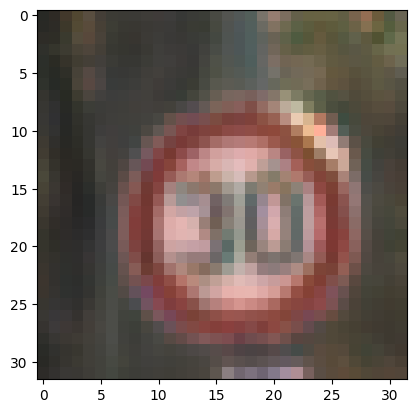

In [10]:
i = 3100

plt.imshow(x_train[i])
y_train[i]

35

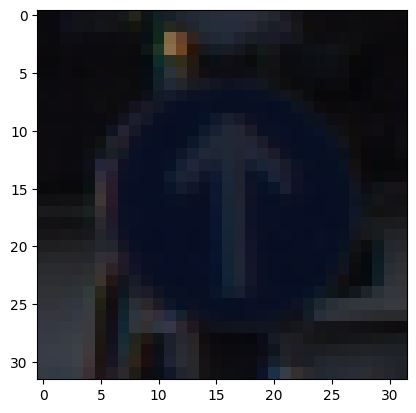

In [11]:
i = 3100

plt.imshow(x_test[i])
y_test[i]

7

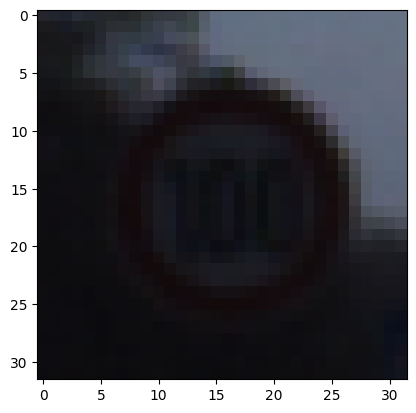

In [12]:
i = 3100

plt.imshow(x_validation[i])
y_validation[i]

#Step 4: Data Preparation

In [13]:
from sklearn.utils import shuffle

In [14]:
x_train, y_train = shuffle(x_train, y_train)

In [15]:
x_train_gray = np.sum(x_train / 3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test / 3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation / 3, axis = 3, keepdims = True)

In [16]:
x_train_gray.shape

(34799, 32, 32, 1)

In [17]:
x_test_gray.shape

(12630, 32, 32, 1)

In [19]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [20]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = (x_validation_gray - 128) / 128

In [21]:
np.max(x_train_gray_norm)

0.9921875

In [22]:
np.min(x_train_gray_norm)

-0.9713541666666666

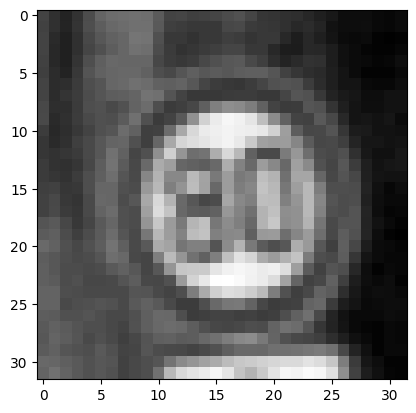

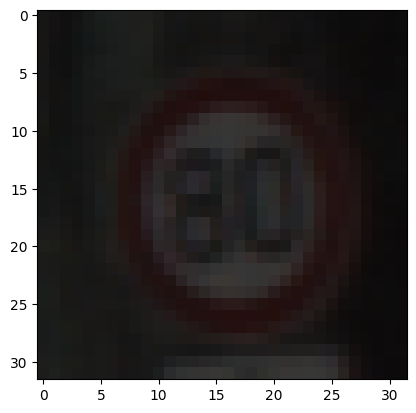

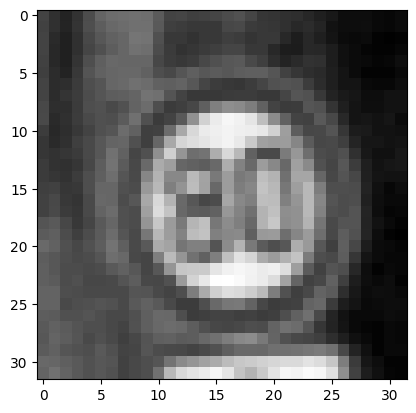

In [25]:
i = 60
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

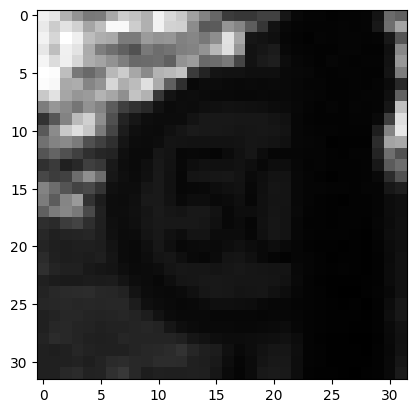

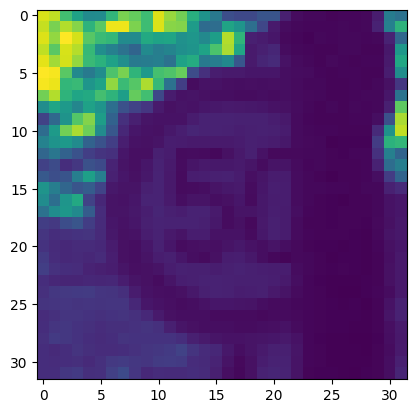

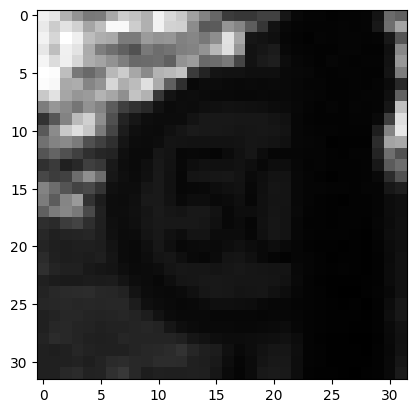

In [26]:
i = 600
plt.imshow(x_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_test_gray[i])
plt.figure()
plt.imshow(x_test_gray_norm[i].squeeze(), cmap = 'gray')

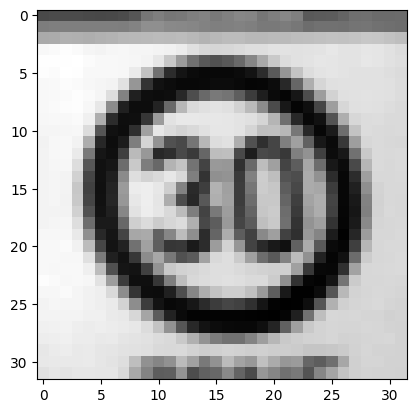

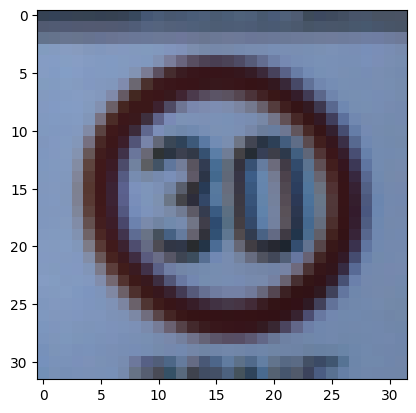

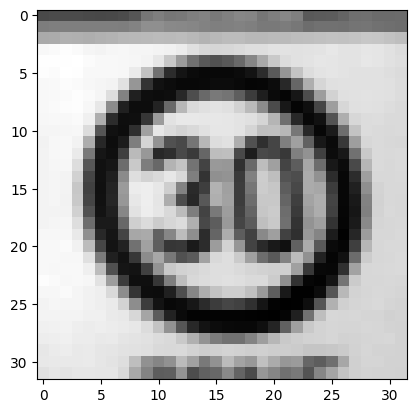

In [27]:
i = 535
plt.imshow(x_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_validation[i])
plt.figure()
plt.imshow(x_validation_gray_norm[i].squeeze(), cmap = 'gray')

#Step 5: Model Creation and Training

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [34]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [37]:
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [38]:
history = LeNet.fit(x_train_gray_norm, y_train, batch_size = 500,
                    epochs = 50,
                    validation_data = (x_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 20s 272ms/step - loss: 3.1032 - accuracy: 0.2003 - val_loss: 2.5187 - val_accuracy: 0.3177
Epoch 2/50
70/70 [==============================] - 21s 295ms/step - loss: 1.5267 - accuracy: 0.5692 - val_loss: 1.2808 - val_accuracy: 0.6224
Epoch 3/50
70/70 [==============================] - 21s 293ms/step - loss: 0.8026 - accuracy: 0.7759 - val_loss: 0.8881 - val_accuracy: 0.7256
Epoch 4/50
70/70 [==============================] - 19s 268ms/step - loss: 0.5703 - accuracy: 0.8417 - val_loss: 0.7381 - val_accuracy: 0.7823
Epoch 5/50
70/70 [==============================] - 19s 269ms/step - loss: 0.4539 - accuracy: 0.8787 - val_loss: 0.6855 - val_accuracy: 0.8000
Epoch 6/50
70/70 [==============================] - 23s 330ms/step - loss: 0.3790 - accuracy: 0.8995 - val_loss: 0.6300 - val_accuracy: 0.8227
Epoch 7/50
70/70 [==============================] - 25s 348ms/step - loss: 0.3219 - accuracy: 0.9169 - val_loss: 0.5607 - val_accuracy: 0.8488

#Step 6: Model Evaluation

In [39]:
score = LeNet.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 9ms/step - loss: 1.0676 - accuracy: 0.8828
Test Accuracy: 0.8828186988830566


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<ipython-input-42-46d7eff3f114>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')


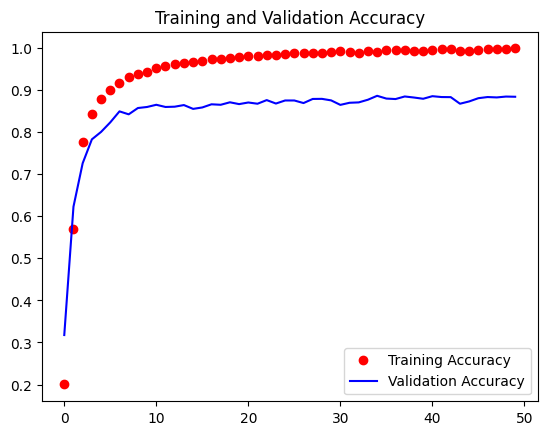

In [42]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

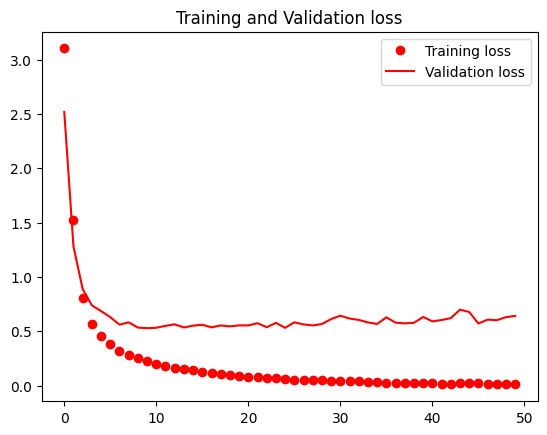

In [43]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [44]:
predict_x = LeNet.predict(x_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 4s 8ms/step


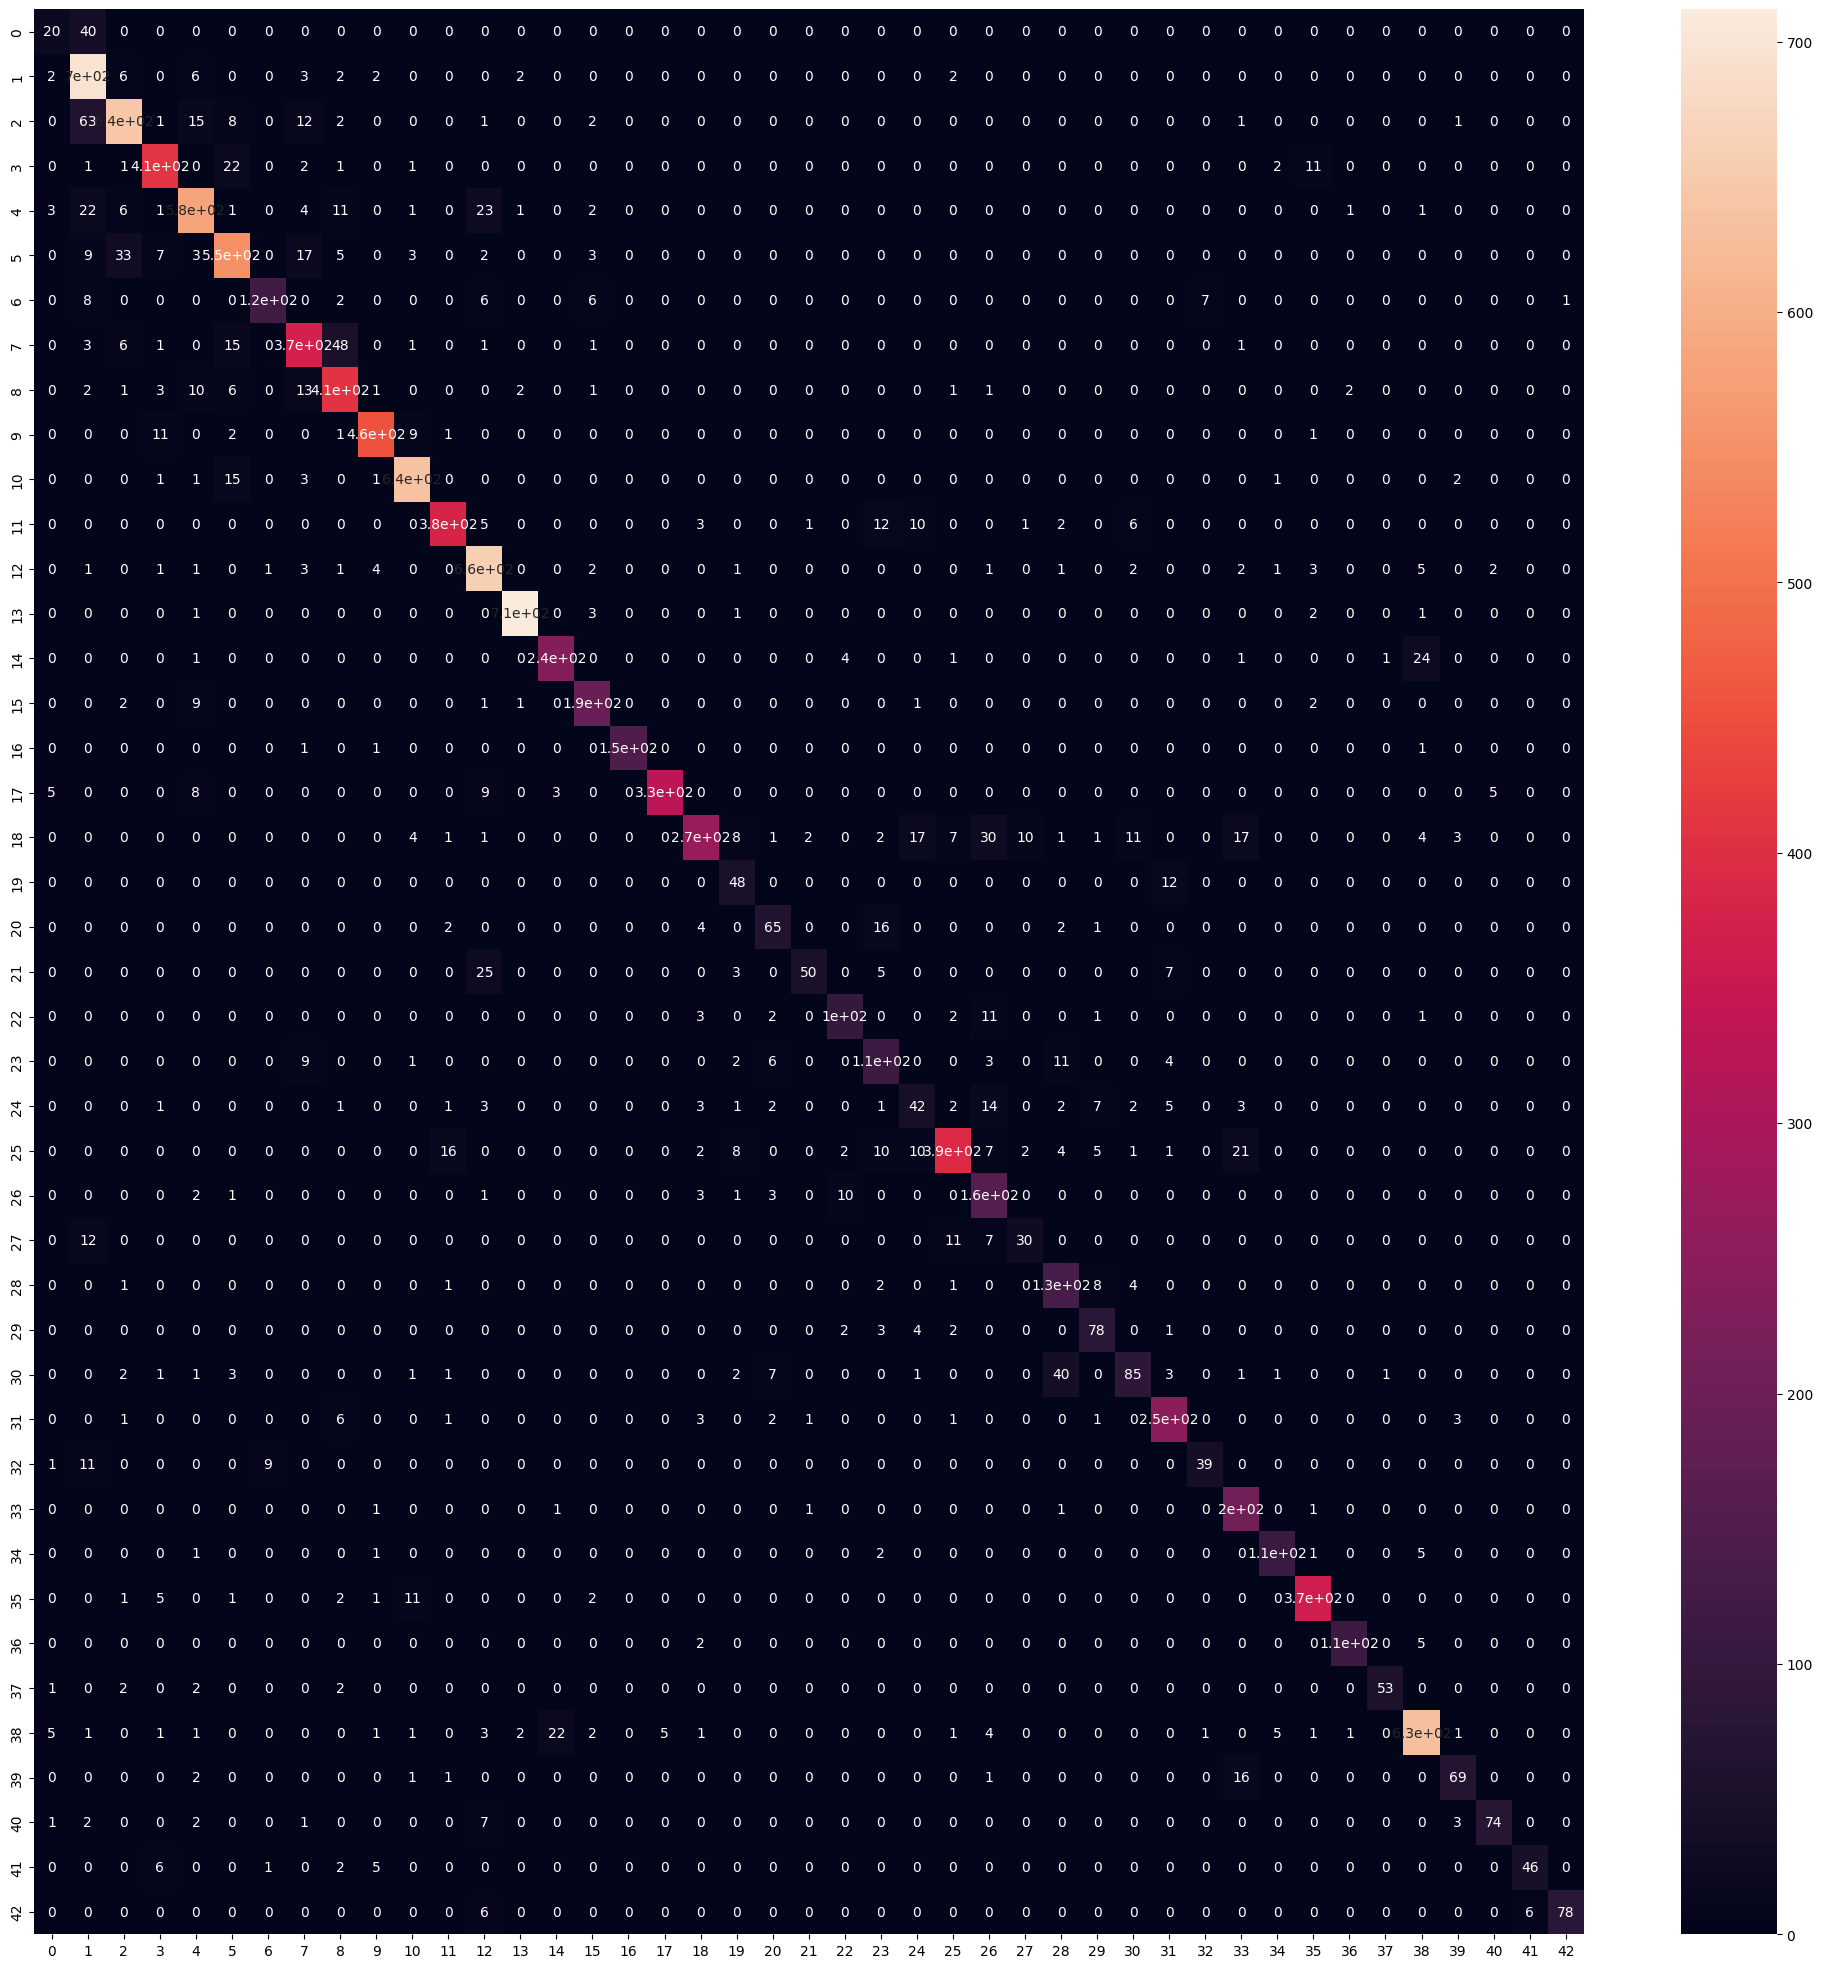

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

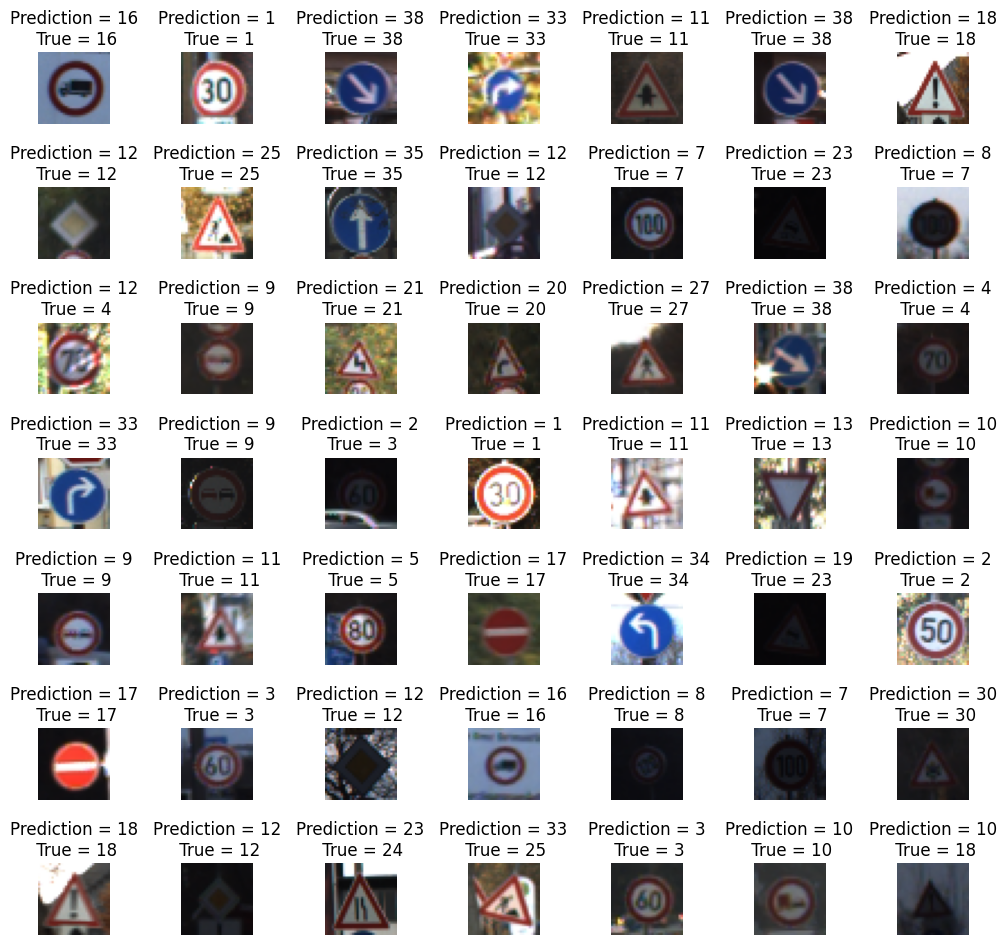

In [46]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)